# Cristian Pulido
# cpulido@unal.edu.co
## Punto 1

In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

%matplotlib inline


def relu(x):
    return max(0,x)
def sigmoid(x):
    return 1.0/(1+np.exp(-x))
def forward_propagate(x, w):
    '''
    x: input value for neuron 5
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
    Returns: a pair of arrays (a, z), where 
             a has the activation values for each neuron, and
             z the output values for each neuron
    '''
    z = np.zeros(5)
    a = np.zeros(5)
    a[4]=x
    z[4]=x
    a[2]=w[5]*z[4]
    z[2]=sigmoid(a[2])
    a[3]=w[6]*z[4]
    z[3]=sigmoid(a[3])
    a[1]=w[3]*z[2]+w[4]*z[3]
    z[1]=sigmoid(a[1])#relu(a[1])
    a[0]=w[0]*z[2]+w[1]*z[1]+w[2]*z[3]
    z[0]=sigmoid(a[0])
    return (a, z)

def bp(x, y, w):
    '''
    x: input value for neuron 5
    y: output value for neuron 1
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
    Returns: an array delta with the delta values for each
             neuron
    '''
    delta = np.zeros(5)
    a,z = forward_propagate(x,w)
    delta[0] = -2*(y-z[0])*z[0]*(1-z[0])
    if a[1]<0:
        delta[1]=0
    else:
        delta[1]=delta[0]*w[1]   
    delta[2]=z[2]*(1-z[2])*(delta[0]*w[0]+delta[1]*w[3])
    delta[3]=z[3]*(1-z[3])*(delta[0]*w[2]+delta[1]*w[4])
    delta[4]=z[4]*(1-z[4])*(delta[2]*w[5]+delta[3]*w[6])
    return delta
def train_step(x, y, w, eta):
    '''
    x: input value for neuron 5
    y: output value for neuron 1
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
    eta: learning rate
    Returns: updated w array
    '''
    # Calculate dw
    # Your code here
    dw = np.zeros(7)
    delta = bp(x,y,w)
    z=forward_propagate(x,w)[1]
    dw[0] = delta[0]*z[2]
    dw[1] = delta[0]*z[1]
    dw[2] = delta[0]*z[3]
    dw[3] = delta[1]*z[2]
    dw[4] = delta[1]*z[3]
    dw[5] = delta[2]*z[4]
    dw[6] = delta[3]*z[4]
    w = w - eta*dw
    return w

In [2]:
data=np.loadtxt('samples_assign4.txt')

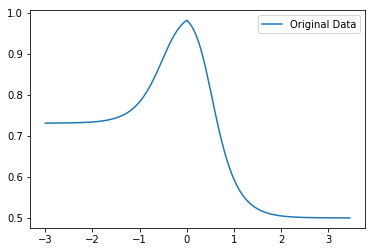

In [3]:
plt.plot(data[:,0],data[:,1],label='Original Data')
plt.title('')
plt.legend()
plt.show()


Pesos finales
[-9.01855840e+00  1.79612919e+01 -1.40351904e+01  3.71158166e+00
 -9.42900208e-01 -2.96204385e+00 -7.36278580e-03]


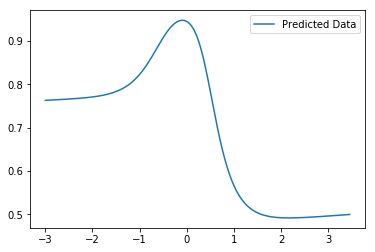

In [4]:
m=data.shape[0]
w=np.array([-9,18,-14,4,-0.8,-3,0.004])
#w=np.array([-9.58630596e+00,  1.81199571e+01, -1.42520585e+01,  4.12310390e+00,-8.42694185e-01, -3.24255387e+00,  3.99856065e-03])
eta=0.1
for j in range(3):
    for i in range(m):
        w=train_step(data[i][0],data[i][1],w,eta)
print("Pesos finales")        
print(w)
salida = np.zeros(m)
for i in range(m):
    salida[i] = forward_propagate(data[i][0],w)[1][0]
plt.plot(data[:,0],salida,label='Predicted Data')
plt.title('')
plt.legend()
plt.show()

## 2 Punto

In [5]:
def hangman(word):
    ### your code here
    size=len(word)
    vacios= [i for i,x in enumerate(word) if x=='_']
    return vacios

In [6]:
hangman("ab_c_")

[2, 4]

## 3 Punto
### Direct prediction

In [13]:
import keras
from keras.applications import mobilenet
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

('image batch size', (1, 224, 224, 3))
[[(u'n01796340', u'ptarmigan', 0.57526696), (u'n02110341', u'dalmatian', 0.31309876), (u'n01819313', u'sulphur-crested_cockatoo', 0.029813604), (u'n02134084', u'ice_bear', 0.019334035), (u'n01632777', u'axolotl', 0.010368787)]]


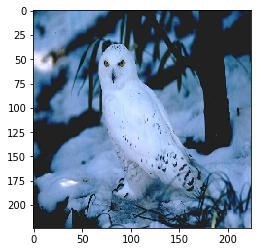

In [14]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
filename = 'birds/owl/owl001.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

# prepare the image for the model
processed_image = mobilenet.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print label

In [66]:
import os
from collections import Counter
egret_samples = os.listdir("birds/egret")
len(dirlist)

def classificador(x):
    result=[]
    samples = os.listdir("birds/"+x)
    for i in samples:
        filename = "birds/"+x+"/"+i
        original = load_img(filename, target_size=(224, 224))
        numpy_image = img_to_array(original)
        image_batch = np.expand_dims(numpy_image, axis=0)
        processed_image = mobilenet.preprocess_input(image_batch.copy())
        predictions = mobilenet_model.predict(processed_image)
        label = decode_predictions(predictions)[0][0][1].encode('ascii','ignore')
        result.append(label)
    return result

In [73]:
aves=['egret','mandarin','owl','puffin','toucan','wood_duck']
label=[]
predict=[]
for i in aves:
    A=classificador(i)
    predict+=A
    B=[i]*len(A)
    label+=B
    

In [98]:
from collections import Counter
common=Counter(predict).most_common(10)## 10 predicciones mas frecuentes
common

[('drake', 188),
 ('toucan', 118),
 ('American_egret', 89),
 ('ptarmigan', 36),
 ('albatross', 19),
 ('magpie', 16),
 ('African_grey', 16),
 ('great_grey_owl', 13),
 ('water_ouzel', 9),
 ('goose', 7)]

In [124]:
com=[]
for i in range(10):
    com.append(common[i][0])
m=np.zeros((6,10))
for i in range(6):
    for j in range(10):
        contador=0
        for k in range(i*100,(i+1)*100):
            if predict[k]==common[j][0]:
                contador+=1
        m[i][j]=contador
names = [_ for _ in aves]
df = pd.DataFrame(m, index=names, columns=com)
df.to_csv('df.csv', index=True, header=True, sep=' ')
df

,drake,toucan,American_egret,ptarmigan,albatross,magpie,African_grey,great_grey_owl,water_ouzel,goose
egret,0.0,0.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mandarin,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
owl,0.0,0.0,0.0,33.0,3.0,0.0,16.0,13.0,0.0,0.0
puffin,12.0,22.0,0.0,3.0,15.0,15.0,0.0,0.0,8.0,5.0
toucan,0.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wood_duck,96.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Transfer learning

In [190]:
from keras.applications import mobilenet
from keras.preprocessing.image import ImageDataGenerator
conv_base = mobilenet.MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [191]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [169]:
train_dir='birds2/train'
validation_dir='birds2/test'
nTrain = sum([len(files) for r, d, files in os.walk(train_dir)])
nVal = sum([len(files) for r, d, files in os.walk(validation_dir)])

In [183]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
 
train_features = np.zeros(shape=(nTrain, 7, 7, 1024))
train_labels = np.zeros(shape=(nTrain,6))
 
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)
i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = conv_base.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nTrain:
        break
         
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 1024))

Found 480 images belonging to 6 classes.


In [189]:
validation_features = np.zeros(shape=(nVal, 7, 7, 1024))
validation_labels = np.zeros(shape=(nVal,6))

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

i = 0
for inputs_batch, labels_batch in validation_generator:
    features_batch = conv_base.predict(inputs_batch)
    validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nVal:
        break

validation_features = np.reshape(validation_features, (nVal, 7 * 7 * 1024))


Found 120 images belonging to 6 classes.


ValueError: could not broadcast input array from shape (20,7,7,1024) into shape (10,7,7,1024)

In [176]:
from keras import models
from keras import layers
from keras import optimizers
 
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 1024))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
 
history = model.fit(train_features,
                    train_labels,
                    epochs=20,
                    batch_size=batch_size
                    )

Epoch 1/20
600/600 [==============================] - 23s 39ms/step - loss: 5.9905 - acc: 0.5617
Epoch 2/20
600/600 [==============================] - 7s 12ms/step - loss: 3.5617 - acc: 0.7417
Epoch 3/20
600/600 [==============================] - 7s 11ms/step - loss: 2.3101 - acc: 0.8417
Epoch 4/20
600/600 [==============================] - 7s 11ms/step - loss: 2.1840 - acc: 0.8583
Epoch 5/20
600/600 [==============================] - 7s 11ms/step - loss: 2.2665 - acc: 0.8500
Epoch 6/20
600/600 [==============================] - 7s 11ms/step - loss: 2.1657 - acc: 0.8633
Epoch 7/20
600/600 [==============================] - 7s 11ms/step - loss: 2.1849 - acc: 0.8617
Epoch 8/20
600/600 [==============================] - 7s 11ms/step - loss: 2.1774 - acc: 0.8633
Epoch 9/20
600/600 [==============================] - 7s 12ms/step - loss: 1.6559 - acc: 0.8817
Epoch 10/20
600/600 [==============================] - 8s 13ms/step - loss: 0.3440 - acc: 0.9600
Epoch 11/20
600/600 [=================

('image batch size', (1, 224, 224, 3))


ValueError: Error when checking : expected dense_5_input to have 2 dimensions, but got array with shape (1, 224, 224, 3)

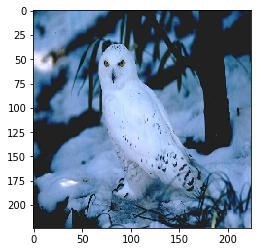

In [181]:
filename = 'birds/owl/owl001.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

# prepare the image for the model
processed_image = mobilenet.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print label